In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("Filpkart_Laptop_Sales.csv")

In [ ]:
df.shape

(480, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brands      480 non-null    object 
 1   Models      480 non-null    object 
 2   Prices      480 non-null    int64  
 3   Processors  480 non-null    object 
 4   RAM         480 non-null    int64  
 5   ROM         480 non-null    int64  
 6   OS          480 non-null    object 
 7   Display     480 non-null    float64
 8   Warranty    480 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 33.9+ KB


In [ ]:
df

,Brands,Models,Prices,Processors,RAM,ROM,OS,Display,Warranty
0,Infinix,Y4,34990,Intel Core i5,16,512,Windows 11,16.0,1
1,MSI,Thin,51990,Intel Core i5,16,512,Windows 11,15.6,2
2,Acer,Aspire,15980,Intel Celeron Dual Core Processor,8,128,Windows 11,11.6,1
3,ASUS,Vivobook,41990,AMD Ryzen 3,8,512,Windows 11,15.6,1
4,Lenovo,IdeaPad,39990,AMD Ryzen 3,16,512,Windows 11,15.6,1
...,...,...,...,...,...,...,...,...,...
475,DELL,Intel,59740,Intel Core i5,8,1024,Windows 11,14.0,1
476,ASUS,Vivobook,40990,Intel Core i7,8,512,Windows 11,14.0,1
477,HP,Intel,51490,Intel Core i7,16,512,Windows 11,15.6,1
478,DELL,Inspiron,49790,Intel Core i3,16,512,Windows 11,15.6,1


In [ ]:
df["Brands"].nunique()

15

In [ ]:
df["Prices"].min()

9999

In [ ]:
df["Prices"].max()

144990

In [ ]:
df["Laptop Series"] = df["Prices"] < 5000 as "Basic Series"

,Prices
0,34990
1,51990
2,15980
3,41990
4,39990
...,...
475,59740
476,40990
477,51490
478,49790


In [ ]:
def classify_category(price):
    if price < 50000:
        return 'Basic'
    elif 50000 <= price < 100000:
        return 'Mid'
    else:
        return 'Premium'

df['Category'] = df['Prices'].apply(classify_category)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brands      480 non-null    object 
 1   Models      480 non-null    object 
 2   Prices      480 non-null    int64  
 3   Processors  480 non-null    object 
 4   RAM         480 non-null    int64  
 5   ROM         480 non-null    int64  
 6   OS          480 non-null    object 
 7   Display     480 non-null    float64
 8   Warranty    480 non-null    int64  
 9   Category    480 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 37.6+ KB


In [ ]:
df["Category"].value_counts()

,count
Category,
Mid,243
Basic,229
Premium,8


In [ ]:
df[df["Prices"] >= 100000]

,Brands,Models,Prices,Processors,RAM,ROM,OS,Display,Warranty,Category
19,Acer,Predator,104990,MediaTek Kompanio 520,16,1024,Windows 11,16.0,1,Premium
153,Apple,MacBook,125990,Intel Core i5,16,512,Mac OS,13.0,1,Premium
215,Apple,Apple,144990,Intel Core i5,24,512,Mac OS,16.0,1,Premium
255,Lenovo,IdeaPad,102990,Intel Core i5,32,1024,Windows 11,14.0,1,Premium
298,HP,OMEN,109990,Intel Core i3,16,1024,Windows 11,15.6,2,Premium
382,Acer,Predator,104990,Intel Core Ultra,16,1024,Windows 11,14.0,1,Premium
414,ASUS,Zenbook,112990,Intel Core i9,16,1024,Windows 11,15.6,1,Premium
459,Apple,MacBook,111990,AMD Ryzen 5,16,256,Mac OS,15.6,1,Premium


In [ ]:
df[df["Category"] == "Premium"]["Brands"].unique()

array(['Acer', 'Apple', 'Lenovo', 'HP', 'ASUS'], dtype=object)

In [ ]:
df[df["Category"] == "Mid"]["Brands"].unique()

array(['MSI', 'ASUS', 'HP', 'Lenovo', 'Acer', 'SAMSUNG', 'Infinix',
       'DELL', 'MOTOROLA', 'Apple', 'GIGABYTE'], dtype=object)

In [ ]:
df[df["Category"] == "Basic"]["Brands"].unique()

array(['Infinix', 'Acer', 'ASUS', 'Lenovo', 'SAMSUNG', 'DELL', 'MSI',
       'HP', 'Ultimus', 'CHUWI', 'Primebook', 'Thomson'], dtype=object)

In [ ]:
df[df["Category"] == "Mid"]

,Brands,Models,Prices,Processors,RAM,ROM,OS,Display,Warranty,Category
1,MSI,Thin,51990,Intel Core i5,16,512,Windows 11,15.6,2,Mid
5,ASUS,Vivobook,50990,AMD Ryzen 7,16,512,Windows 11,15.6,1,Mid
13,HP,Intel,51490,Intel Core i3,16,512,Windows 11,15.6,1,Mid
14,Lenovo,Yoga,78990,Intel Core i5,16,512,Windows 11,14.0,1,Mid
25,Lenovo,LOQ,63990,Intel Core i5,16,512,Windows 11,15.6,1,Mid
...,...,...,...,...,...,...,...,...,...,...
469,DELL,15,69490,Intel Core i3,16,512,Windows 11,15.3,1,Mid
470,ASUS,Vivobook,94990,Intel Core i3,16,1024,Windows 11,15.6,1,Mid
473,HP,15s,73990,Intel Core i7,16,512,Windows 11,14.0,1,Mid
475,DELL,Intel,59740,Intel Core i5,8,1024,Windows 11,14.0,1,Mid


In [ ]:
df[df["Category"] == "Basic"]

,Brands,Models,Prices,Processors,RAM,ROM,OS,Display,Warranty,Category
0,Infinix,Y4,34990,Intel Core i5,16,512,Windows 11,16.0,1,Basic
2,Acer,Aspire,15980,Intel Celeron Dual Core Processor,8,128,Windows 11,11.6,1,Basic
3,ASUS,Vivobook,41990,AMD Ryzen 3,8,512,Windows 11,15.6,1,Basic
4,Lenovo,IdeaPad,39990,AMD Ryzen 3,16,512,Windows 11,15.6,1,Basic
6,Acer,Aspire,17990,Intel Core i5,8,256,Windows 11,11.6,1,Basic
...,...,...,...,...,...,...,...,...,...,...
472,Infinix,X3,42990,Intel Core i7,16,512,Windows 11,15.6,1,Basic
474,Acer,Aspire,30990,Intel Core i7,8,512,Windows 11,15.6,1,Basic
476,ASUS,Vivobook,40990,Intel Core i7,8,512,Windows 11,14.0,1,Basic
478,DELL,Inspiron,49790,Intel Core i3,16,512,Windows 11,15.6,1,Basic


In [ ]:
df[df["Category"] == "Basic"]["Brands"].unique()

array(['Infinix', 'Acer', 'ASUS', 'Lenovo', 'SAMSUNG', 'DELL', 'MSI',
       'HP', 'Ultimus', 'CHUWI', 'Primebook', 'Thomson'], dtype=object)

In [ ]:
bb = set(df[df["Category"] == "Basic"]["Brands"])
mb = set(df[df["Category"] == "Mid"]["Brands"])
pb= set(df[df["Category"] == "Premium"]["Brands"])

all_brands = bb & mb & pb
print(all_brands)

{'Lenovo', 'Acer', 'HP', 'ASUS'}


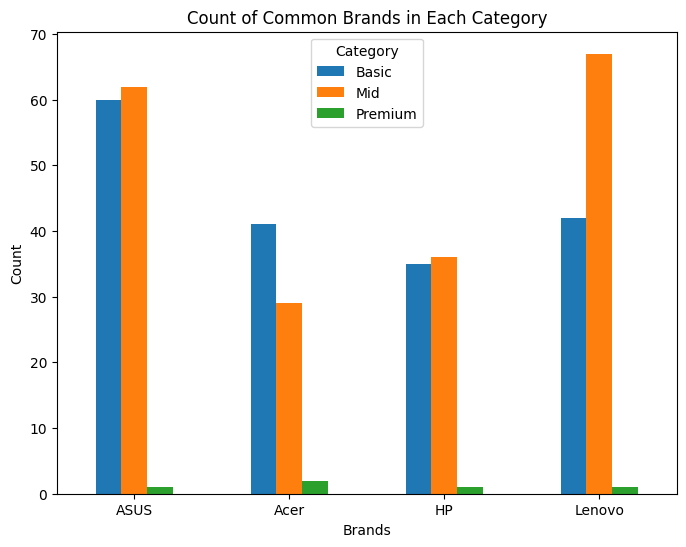

In [ ]:
# Filter df to rows with brands in the set
common_brands_df = df[df["Brands"].isin(all_brands)]

# Count how many times each common brand appears in each category
counts = common_brands_df.groupby(["Brands", "Category"]).size().unstack(fill_value=0)

# Now you can plot the counts DataFrame
counts.plot(kind='bar', figsize=(8, 6))
plt.title("Count of Common Brands in Each Category")
plt.xlabel("Brands")
plt.ylabel("Count")
plt.xticks(rotation=360)
plt.show()

In [ ]:
df["Brands"].value_counts()

,count
Brands,
ASUS,123
Lenovo,110
Acer,72
HP,72
SAMSUNG,37
DELL,21
MSI,19
Infinix,9
MOTOROLA,5


In [ ]:
df.groupby("Brands").agg({"Category": "count"})

,Category
Brands,
ASUS,123
Acer,72
Apple,4
CHUWI,3
DELL,21
GIGABYTE,1
HP,72
Infinix,9
Lenovo,110


In [ ]:
brand_counts = df.groupby("Brands")["Category"].count().reset_index()

In [ ]:
brand_counts

,Brands,Category
0,ASUS,123
1,Acer,72
2,Apple,4
3,CHUWI,3
4,DELL,21
5,GIGABYTE,1
6,HP,72
7,Infinix,9
8,Lenovo,110
9,MOTOROLA,5


<ipython-input-47-aad1fff6dc53>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Brands", y="Count", data=brand_counts, palette=sns.color_palette("husl", len(brand_counts)))


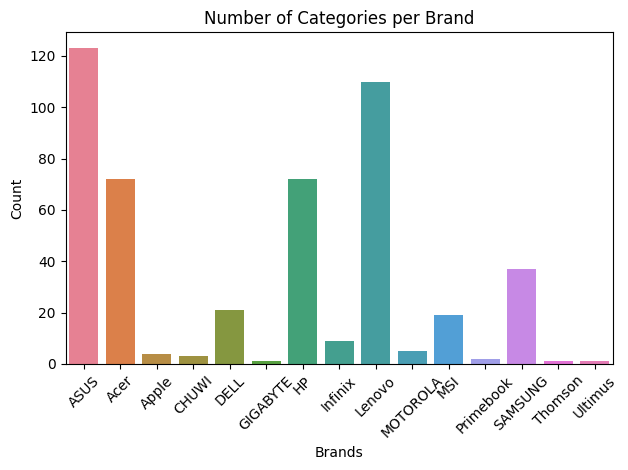

In [ ]:
brand_counts = df.groupby("Brands")["Category"].count().reset_index()
brand_counts.rename(columns={"Category": "Count"}, inplace=True)

# Plot
sns.barplot(x="Brands", y="Count", data=brand_counts, palette=sns.color_palette("husl", len(brand_counts)))
plt.title("Number of Categories per Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
brand_counts = df.groupby("Brands")["Category"].count().reset_index()
brand_counts.rename(columns={"Category": "Count"}, inplace=True)

# Plot
fig = px.bar(
    brand_counts,
    x="Brands",
    y="Count",
    color="Brands",
    text="Count",
    title="Number of Laptops Per Brand",
)

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [ ]:
df.groupby(["Category"])["Brands"].count()

,Brands
Category,
Basic,229
Mid,243
Premium,8


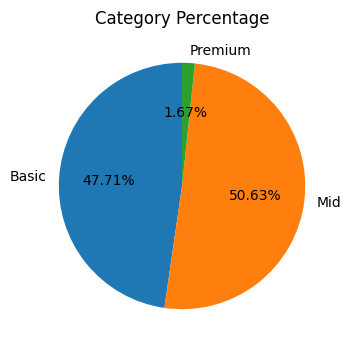

In [ ]:
counts = df.groupby("Category")["Brands"].count()

# Plot
counts.plot.pie(autopct='%0.2f%%', startangle=90, figsize=(4,4))
plt.ylabel('')
plt.title('Category Percentage')
plt.show()

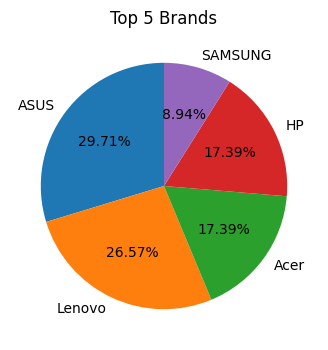

In [ ]:
z= df["Brands"].value_counts().nlargest(5)
z.plot.pie(autopct='%0.2f%%', startangle=90, figsize=(4,4))
plt.ylabel('')
plt.title('Top 5 Brands')
plt.show()

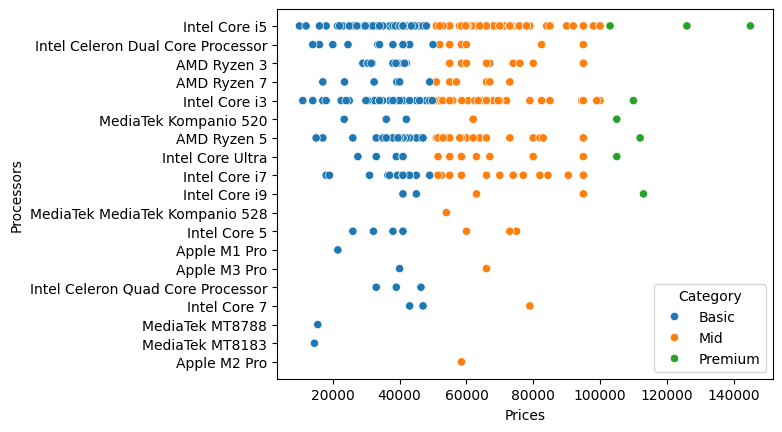

In [ ]:
sns.scatterplot(x =df["Prices"], y = df['Processors'], hue = df["Category"])
plt.show()

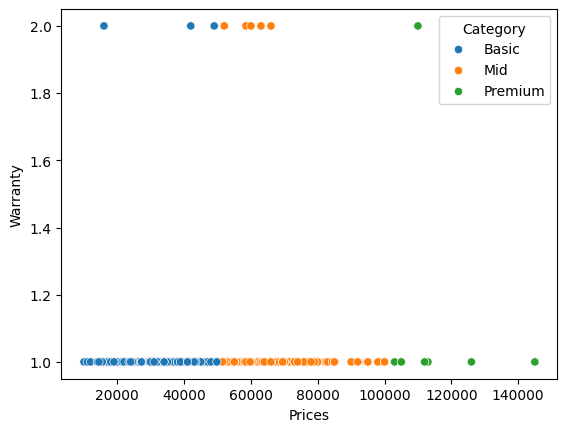

In [ ]:
sns.scatterplot(x =df["Prices"], y = df['Warranty'], hue = df["Category"])
plt.show()

In [ ]:
os = df["OS"].value_counts().reset_index()
os.columns = ["OS", "Count"]

fig = px.bar(
    os,
    x="OS",
    y="Count",
    color="OS",
    text="Count",
    title="Number of Devices Per OS",
)

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [ ]:
ram = df.groupby(df["Category"]).agg({"RAM":"mean"})

In [ ]:
rom = df.groupby(df["Category"]).agg({"ROM":"mean"})

<ipython-input-100-b29beec15a71>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-100-b29beec15a71>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




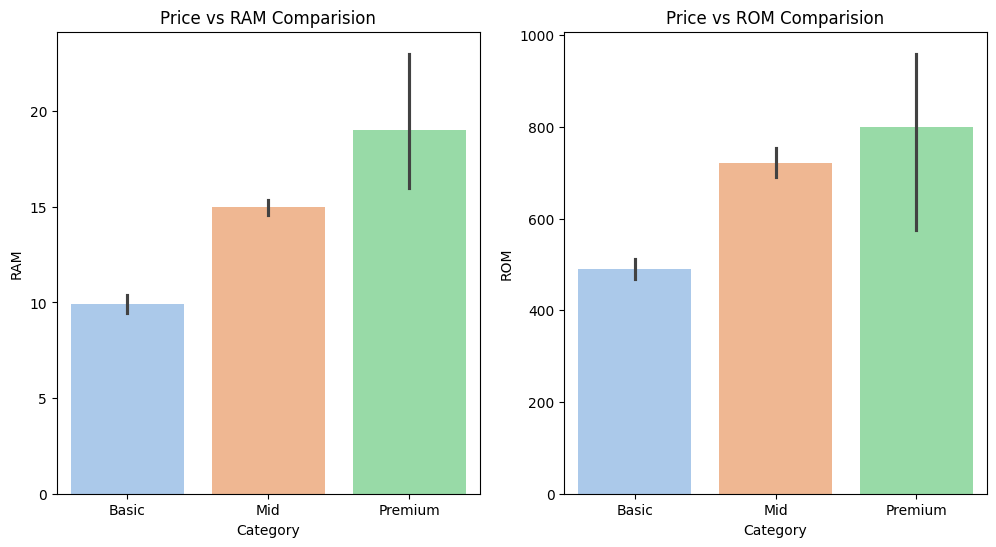

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x = df["Category"], y = df["RAM"], data=ram, palette="pastel")
plt.title("Price vs RAM Comparision")

plt.subplot(1,2,2)
sns.barplot(x = df["Category"], y = df["ROM"], data=ram, palette="pastel")
plt.title("Price vs ROM Comparision")

plt.show()